In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/driver/')

Mounted at /content/driver/


In [7]:
dataset_path = ('/content/driver/MyDrive/dataset/geant-flat-tms.csv')
df = pd.read_csv(dataset_path)

In [8]:
od_number = 102
dataset = df.iloc[:, od_number]
dataset = dataset.astype('float32')
dataset = dataset.values
dataset = np.reshape(dataset,(-1,1))
dataset

array([[   0.    ],
       [   0.    ],
       [   0.    ],
       ...,
       [ 982.4   ],
       [ 829.2622],
       [1680.9423]], dtype=float32)

In [9]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 8605  test_data_size: 2144


In [10]:

vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(100, input_dim=look_back, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_squared_error', optimizer='adam')

vanilla_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


In [11]:
trainX1 = np.squeeze(trainX)
testX1 = np.squeeze(testX)

autoencoder = Sequential()
autoencoder.add(Dense(32, activation='relu', input_shape=(look_back,)))
autoencoder.add(Dense(16, activation='relu'))
autoencoder.add(Dense(8, activation='relu'))
autoencoder.add(Dense(16, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(1, activation='linear'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,737
Trainable params: 1,737
Non-traina

In [12]:
vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
189/189 - 8s - loss: 8.5087e-04 - val_loss: 0.0018 - 8s/epoch - 45ms/step
Epoch 2/200
189/189 - 1s - loss: 6.6151e-04 - val_loss: 0.0016 - 1s/epoch - 7ms/step
Epoch 3/200
189/189 - 1s - loss: 6.2299e-04 - val_loss: 0.0016 - 1s/epoch - 6ms/step
Epoch 4/200
189/189 - 1s - loss: 6.1729e-04 - val_loss: 0.0016 - 1s/epoch - 6ms/step
Epoch 5/200
189/189 - 1s - loss: 6.1167e-04 - val_loss: 0.0016 - 1s/epoch - 6ms/step
Epoch 6/200
189/189 - 2s - loss: 6.0970e-04 - val_loss: 0.0016 - 2s/epoch - 9ms/step
Epoch 7/200
189/189 - 2s - loss: 6.0552e-04 - val_loss: 0.0016 - 2s/epoch - 10ms/step
Epoch 8/200
189/189 - 1s - loss: 6.0320e-04 - val_loss: 0.0016 - 1s/epoch - 7ms/step
Epoch 9/200
189/189 - 1s - loss: 6.0269e-04 - val_loss: 0.0016 - 1s/epoch - 7ms/step
Epoch 10/200
189/189 - 1s - loss: 6.0224e-04 - val_loss: 0.0016 - 1s/epoch - 7ms/step
Epoch 11/200
189/189 - 1s - loss: 5.9398e-04 - val_loss: 0.0016 - 1s/epoch - 7ms/step
Epoch 12/200
189/189 - 1s - loss: 5.9496e-04 - val_loss: 0.00

In [13]:
autoencoder.fit(trainX1, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
189/189 - 5s - loss: 8.2161e-04 - val_loss: 0.0015 - 5s/epoch - 25ms/step
Epoch 2/200
189/189 - 1s - loss: 6.3142e-04 - val_loss: 0.0016 - 737ms/epoch - 4ms/step
Epoch 3/200
189/189 - 1s - loss: 6.3109e-04 - val_loss: 0.0016 - 743ms/epoch - 4ms/step
Epoch 4/200
189/189 - 1s - loss: 6.3230e-04 - val_loss: 0.0016 - 733ms/epoch - 4ms/step
Epoch 5/200
189/189 - 1s - loss: 6.1695e-04 - val_loss: 0.0016 - 743ms/epoch - 4ms/step
Epoch 6/200
189/189 - 1s - loss: 6.0679e-04 - val_loss: 0.0016 - 737ms/epoch - 4ms/step
Epoch 7/200
189/189 - 1s - loss: 6.1231e-04 - val_loss: 0.0016 - 702ms/epoch - 4ms/step
Epoch 8/200
189/189 - 1s - loss: 5.9894e-04 - val_loss: 0.0016 - 779ms/epoch - 4ms/step
Epoch 9/200
189/189 - 1s - loss: 6.0515e-04 - val_loss: 0.0017 - 735ms/epoch - 4ms/step
Epoch 10/200
189/189 - 1s - loss: 6.0184e-04 - val_loss: 0.0018 - 719ms/epoch - 4ms/step
Epoch 11/200
189/189 - 1s - loss: 6.0426e-04 - val_loss: 0.0016 - 735ms/epoch - 4ms/step
Epoch 12/200
189/189 - 1s - loss

In [14]:
vanilla_predict = vanilla_lstm.predict(testX)
vanilla_result = scaler.inverse_transform(vanilla_predict)

67/67 [==============================] - 0s 2ms/step


In [15]:
autoencoder_predict = autoencoder.predict(testX1)
autoencoder_result = scaler.inverse_transform(autoencoder_predict)

67/67 [==============================] - 0s 2ms/step


In [16]:
true_testY = scaler.inverse_transform([testY])
true_testY = np.reshape(true_testY,(true_testY.shape[1],1))

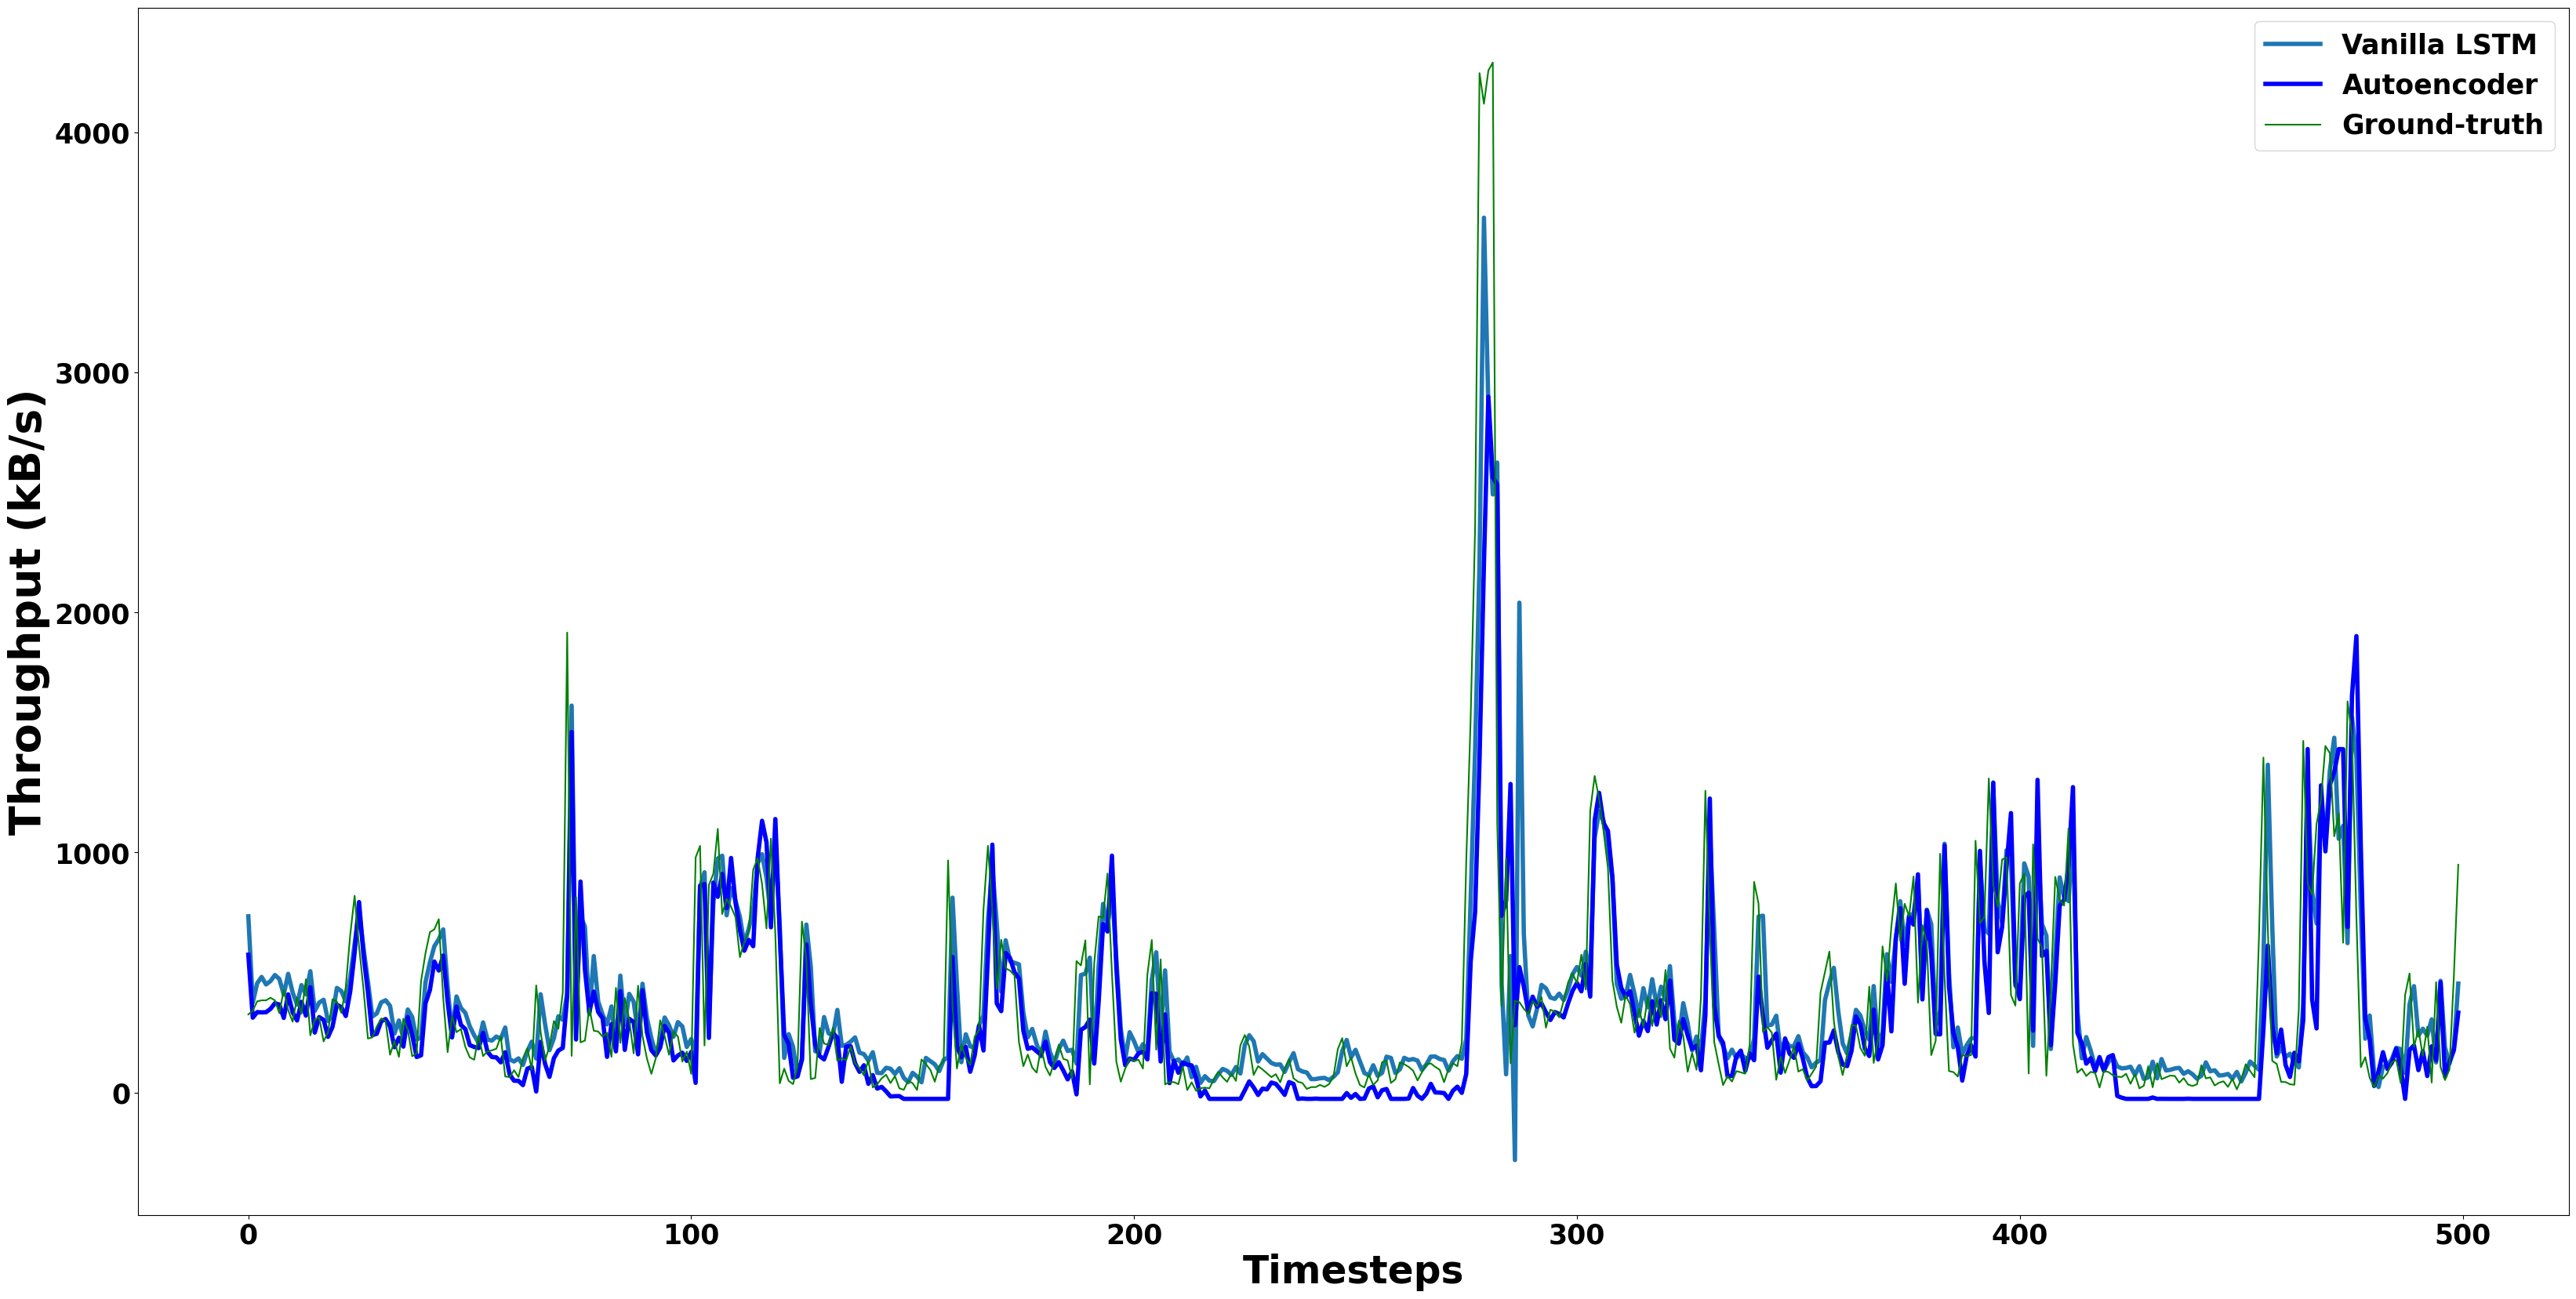

In [17]:
timesteps = 500
plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(vanilla_result[0:timesteps], label = "Vanilla LSTM",linewidth=4)
plt.plot(autoencoder_result[0:timesteps], label = "Autoencoder",linewidth=4, color='b')
plt.plot(true_testY[0:timesteps], label = "Ground-truth", color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=35)
plt.ylabel('Throughput (kB/s)', fontweight='bold', fontsize = 40)
plt.legend()

In [18]:
vanil_temp = 0
au_temp = 0

for i in range(len(testY)):
    vanil_temp += (testY[i] - vanilla_predict[i])**2
    au_temp += (testY[i] - autoencoder_predict[i])**2

v_rmse = math.sqrt(vanil_temp / len(testY))
b_rmse = math.sqrt(np.mean(au_temp) / len(testY))

<BarContainer object of 2 artists>

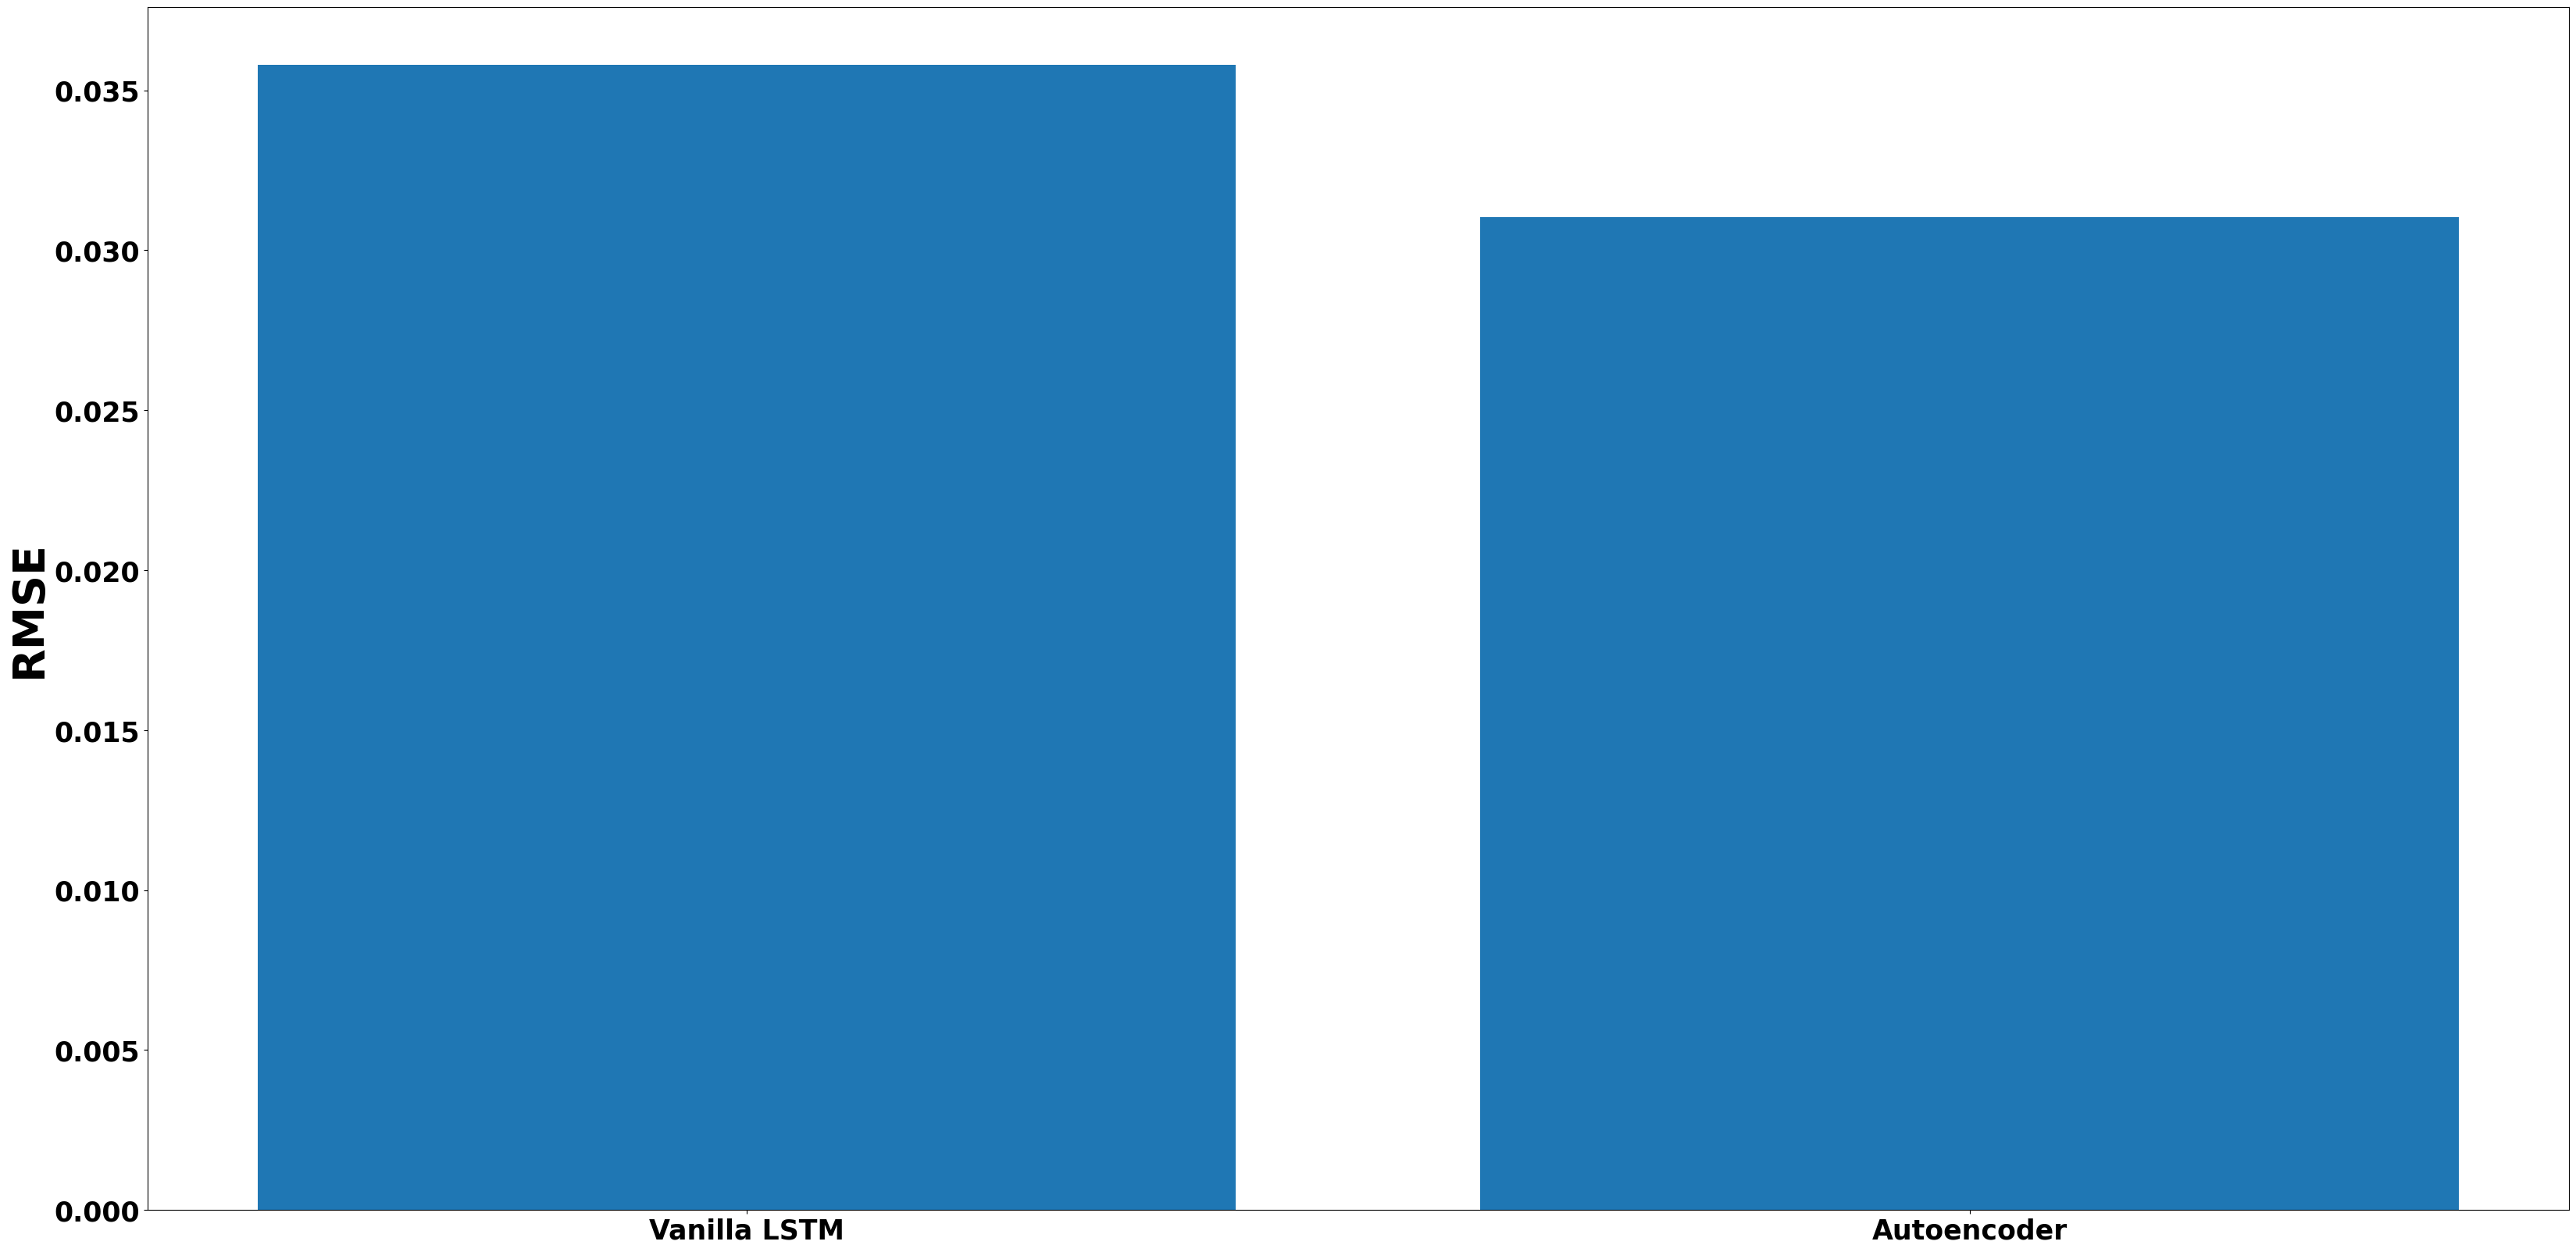

In [19]:
fig = plt.figure()
names = ['Vanilla LSTM', 'Autoencoder']
values = [v_rmse,b_rmse]
plt.ylabel('RMSE', fontweight='bold',fontsize= 40)
# plt.ylim([0.006,0.0125])
plt.bar(names,values) 